## Imbalanced

Imbalance data refers to a situation in which the classes within the dataset are not represented equally.

**Is a classification problem that affects the target variable.**


#### Loading and preparing the data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [3]:
titanic = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Check for anomalies

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Upon checking the number of null values, we are going to drop the column **Cabin** and also dropping rows where **Age** is null.

In [5]:
titanic.drop(columns="Cabin", inplace = True)
titanic.dropna(inplace=True)

In [6]:
titanic.shape

(712, 11)

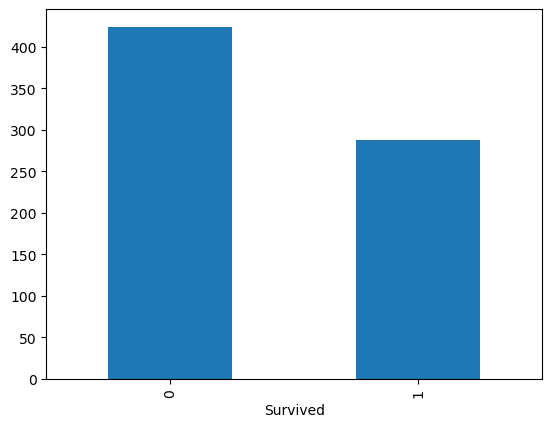

In [7]:
survived = titanic["Survived"].value_counts()
survived.plot(kind="bar")
plt.show()

- Preparing the data before modeling

In [8]:
titanic.drop(columns=["Name", "Ticket", "PassengerId"], inplace = True)

In [9]:
titanic["Sex"] = titanic["Sex"].replace({"male":0,
                                         "female":1})

/var/folders/h0/_mcwfc4x16ddx_v9ng5p106r0000gn/T/ipykernel_9065/1812906043.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["Sex"] = titanic["Sex"].replace({"male":0,


In [10]:
titanic = pd.get_dummies(titanic, columns=["Embarked"])

In [11]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


For baseline, we will train a Logistic Regression in imbalanced data.

In [12]:
features = titanic.drop(columns = ["Survived"])
target = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
log_reg = LogisticRegression()

In [15]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
log_reg.score(X_test_scaled, y_test)

0.7865168539325843

In [17]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       107
           1       0.72      0.76      0.74        71

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



#### Oversampling

In [25]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [20]:
train["Survived"] = y_train.values

In [19]:
survived = train[train["Survived"] == 1]
no_survived = train[train["Survived"] == 0]

In [20]:
yes_diabetes_oversampled = resample(survived, 
                                    replace=True, 
                                    n_samples = len(no_survived),
                                    random_state=0)

In [21]:
train_over = pd.concat([yes_diabetes_oversampled, no_survived])
train_over

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
414,-1.520614,-0.752318,0.457405,-0.554683,0.661839,8.572376,2.149663,-0.212155,-1.877611,1
122,0.892485,-0.752318,-0.310087,0.503177,-0.512321,-0.485413,-0.465189,-0.212155,0.532592,1
267,-0.314064,1.329225,-0.798490,-0.554683,0.661839,-0.212092,-0.465189,-0.212155,0.532592,1
480,0.892485,1.329225,0.038773,-0.554683,-0.512321,-0.401038,-0.465189,-0.212155,0.532592,1
155,-0.314064,1.329225,0.178317,-0.554683,-0.512321,-0.391613,-0.465189,-0.212155,0.532592,1
...,...,...,...,...,...,...,...,...,...,...
524,-1.520614,-0.752318,-0.030999,-0.554683,-0.512321,-0.086428,-0.465189,-0.212155,0.532592,0
528,0.892485,-0.752318,-0.379859,-0.554683,-0.512321,-0.490425,-0.465189,-0.212155,0.532592,0
529,-1.520614,-0.752318,2.411019,0.503177,4.184318,4.096403,-0.465189,-0.212155,0.532592,0
530,0.892485,-0.752318,0.248089,-0.554683,-0.512321,-0.485413,-0.465189,-0.212155,0.532592,0


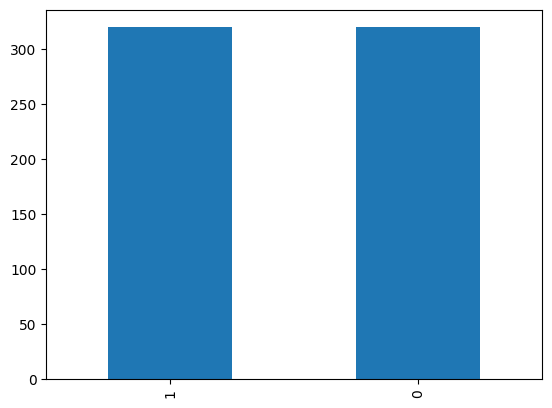

In [22]:
survived_plt = train_over["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

- Now, with balanced data, we will create a new instance of Logistic Regression.

In [23]:
X_train_over = train_over.drop(columns = ["Survived"])
y_train_over = train_over["Survived"]

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [25]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       104
           1       0.74      0.76      0.75        74

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



c:\Users\frede\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Undersampling

Undersampling involves removing data points from the majority class to align its size with that of the minority class

In [ ]:
no_diabetes_undersampled = resample(no_survived, 
                                    replace=False, 
                                    n_samples = len(survived),
                                    random_state=0)
no_diabetes_undersampled

In [ ]:
train_under = pd.concat([no_diabetes_undersampled, survived])
train_under

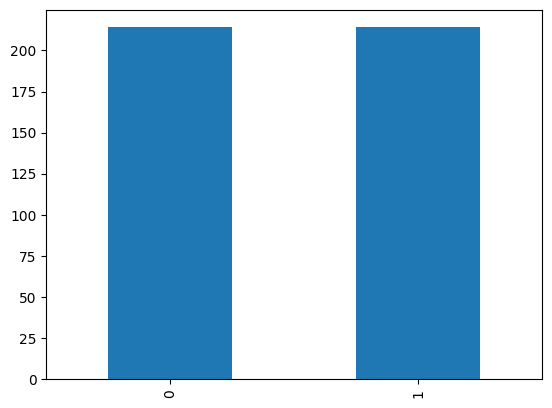

In [36]:
survived_plt = train_under["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

Now, we have the same amount of observations for both survived and not_survived. Let's see how it can impact our model 

- Separating our features from our target

In [38]:
X_train_under = train_under.drop(columns = ["Survived"])
y_train_under = train_under["Survived"]

- Model training

In [39]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

- Evaluate our model

In [40]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       104
           1       0.75      0.77      0.76        74

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



c:\Users\frede\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### SMOTE

SMOTE utilizes KNN approach to generate synthetic samples for the minority class.

SMOTE comes from a different package - **imblearn**

In [41]:
from imblearn.over_sampling import SMOTE

Now, we need to create a SMOTE object in order to balance our data

- **sampling_strategy** - corresponds to the ratio of the number of samples in the minority class over the number of samples in the majority class.

In [ ]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [ ]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train,y_train = sm.fit_resample(X_train_scaled,y_train)

In [42]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [50]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

- Now lets train our model, to see if get any improvements.

In [51]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

- Evaluate our model

In [52]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       104
           1       0.74      0.76      0.75        74

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

